
https://www.kaggle.com/c/digit-recognizer

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from random import randint
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


Using TensorFlow backend.


In [2]:
train_data=pd.read_csv('../input/train.csv')
test_data=pd.read_csv('../input/test.csv')
sub_sample=pd.read_csv('../input/sample_submission.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
sub_sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
Y_train = train_data["label"]
Y_train = np.array(Y_train, np.uint8)

In [7]:
X_train = train_data.drop(labels = ["label"],axis = 1) 
X_train = np.array(X_train)
X_test=np.array(test_data)

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
Y_train

(42000, 784)
(42000,)
(28000, 784)


array([1, 0, 1, ..., 7, 6, 9], dtype=uint8)

In [9]:
# free memory space
del train_data

## Data Visualization

In [10]:
#Convert train datset to (num_images, img_rows, img_cols) format 
train_images = X_train.reshape(X_train.shape[0], 28, 28)

In [11]:
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(28,28),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        # Plot image.
        
        ax.imshow(images[i], cmap=plt.get_cmap('gray'))    
        xlabel = "the number is: {0}".format(classes[i])
    
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(28)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    
    plt.show()

Images to show: 9
Classes to show: 9


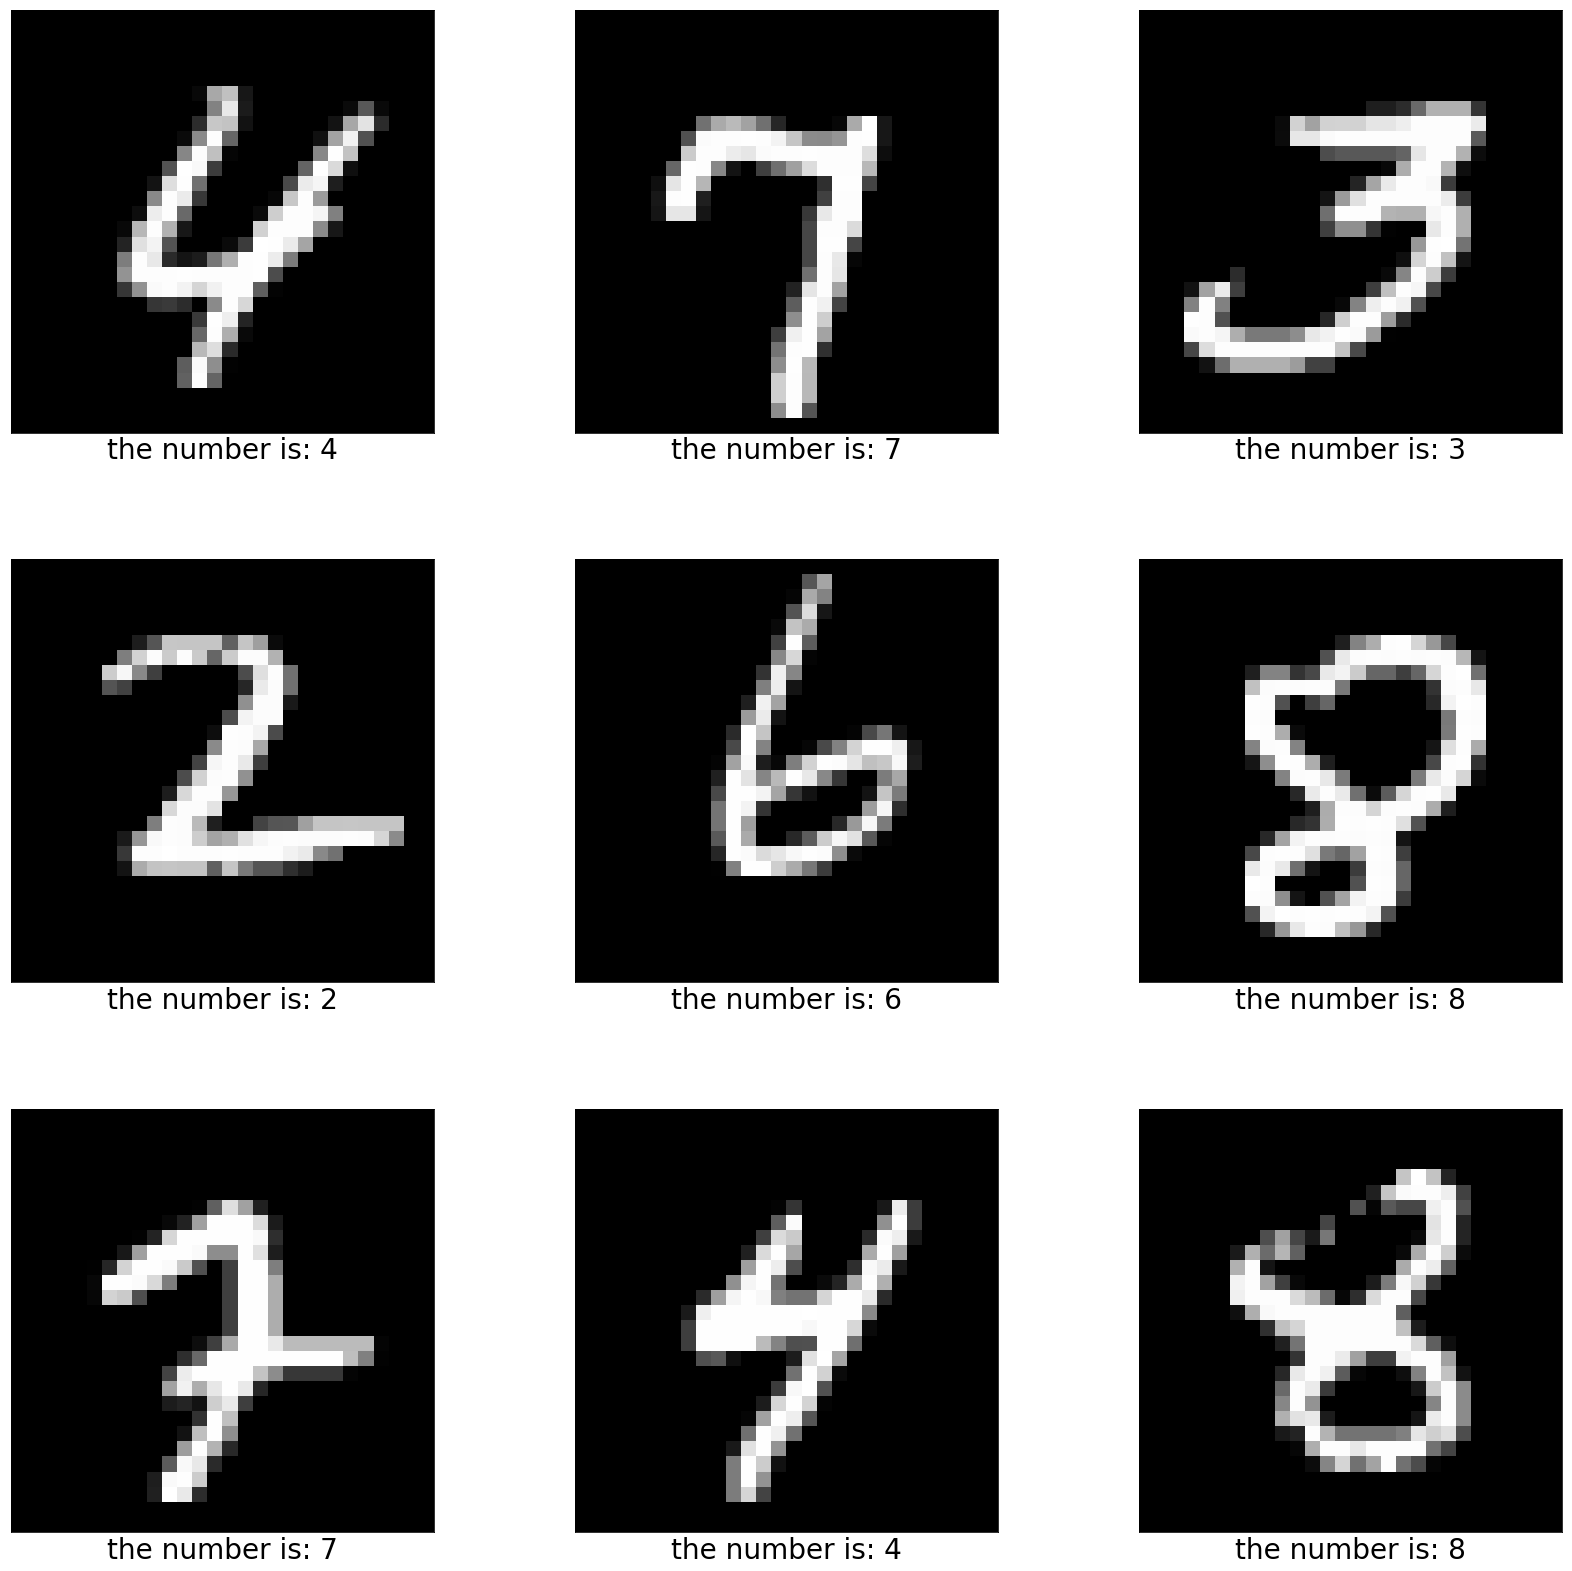

In [12]:
random_numbers = [randint(0, len(train_images)) for p in range(0,9)]
images_to_show = [train_images[i] for i in random_numbers]
classes_to_show = [Y_train[i] for i in random_numbers]
print("Images to show: {0}".format(len(images_to_show)))
print("Classes to show: {0}".format(len(classes_to_show)))
#plot the images
plot_images(images_to_show, classes_to_show)

* ## One Hot encoding 

**Encode labels to one hot vectors (ex : 4 ---> [0,0,0,0,1,0,0,0,0,0]   ,    9 ---> [0,0,0,0,0,0,0,0,0,1])**

In [13]:
from keras.utils.np_utils import to_categorical

Y_train= to_categorical(Y_train)


In [14]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [15]:
Y_train.shape

(42000, 10)

In [16]:
#Splitting the train_images into the Training set and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val= train_test_split(X_train, Y_train,
               test_size=0.1, random_state=42,stratify=Y_train)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)

(37800, 784)
(37800, 10)
(4200, 784)
(4200, 10)
(28000, 784)


In [18]:
X_train = X_train.astype('float32')/255
X_val=X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

## Define Model by keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout
from keras.optimizers import SGD , RMSprop,Adam

In [28]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


In [30]:
sgd = SGD(lr=0.000002, decay=1e-6, momentum=0.9)
rmsprop = RMSprop(lr=0.0003 ,decay=1e-4)
adam= Adam(lr=0.0003 ,decay=1e-4)

model.compile(optimizer=rmsprop,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
H1= model.fit(X_train, Y_train, batch_size = 256, epochs = 100, 
              validation_data = (X_val, Y_val), verbose = 1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 2s 40us/step - loss: 0.4755 - acc: 0.8612 - val_loss: 0.2417 - val_acc: 0.9293
Epoch 2/100
37800/37800 [==============================] - 1s 31us/step - loss: 0.1959 - acc: 0.9414 - val_loss: 0.1684 - val_acc: 0.9517
Epoch 3/100
37800/37800 [==============================] - 1s 26us/step - loss: 0.1338 - acc: 0.9592 - val_loss: 0.1390 - val_acc: 0.9583
Epoch 4/100
37800/37800 [==============================] - 1s 27us/step - loss: 0.1006 - acc: 0.9695 - val_loss: 0.1148 - val_acc: 0.9612
Epoch 5/100
37800/37800 [==============================] - 1s 27us/step - loss: 0.0761 - acc: 0.9778 - val_loss: 0.1166 - val_acc: 0.9662
Epoch 6/100
37800/37800 [==============================] - 1s 27us/step - loss: 0.0612 - acc: 0.9810 - val_loss: 0.1281 - val_acc: 0.9617
Epoch 7/100
37800/37800 [==============================] - 1s 27us/step - loss: 0.0491 - acc: 0.9847 - val_loss: 0.1018 - v

Epoch 59/100
37800/37800 [==============================] - 1s 27us/step - loss: 4.3525e-04 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9733
Epoch 60/100
37800/37800 [==============================] - 1s 27us/step - loss: 5.2561e-04 - acc: 0.9999 - val_loss: 0.2425 - val_acc: 0.9726
Epoch 61/100
37800/37800 [==============================] - 1s 27us/step - loss: 4.4350e-04 - acc: 1.0000 - val_loss: 0.2518 - val_acc: 0.9731
Epoch 62/100
37800/37800 [==============================] - 1s 27us/step - loss: 4.5213e-04 - acc: 0.9999 - val_loss: 0.2410 - val_acc: 0.9731
Epoch 63/100
37800/37800 [==============================] - 1s 27us/step - loss: 4.3675e-04 - acc: 1.0000 - val_loss: 0.2426 - val_acc: 0.9743
Epoch 64/100
37800/37800 [==============================] - 1s 27us/step - loss: 6.1817e-04 - acc: 0.9999 - val_loss: 0.2373 - val_acc: 0.9752
Epoch 65/100
37800/37800 [==============================] - 1s 27us/step - loss: 4.2655e-04 - acc: 1.0000 - val_loss: 0.2370 - val_acc: 0.9745

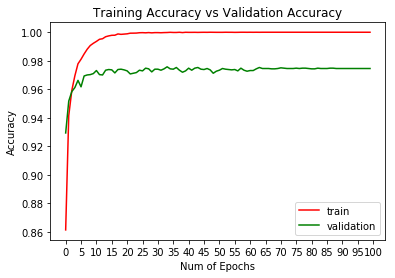

In [32]:
plt.figure(0)
plt.plot(H1.history['acc'],'r')
plt.plot(H1.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 5.0))
plt.rcParams['figure.figsize'] = (14, 8)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

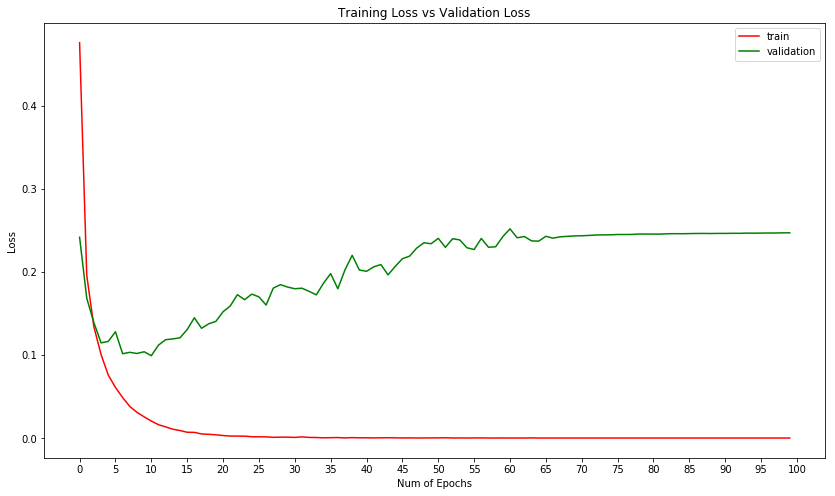

In [33]:
plt.figure(1)
plt.plot(H1.history['loss'],'r')
plt.plot(H1.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 5.0))
plt.rcParams['figure.figsize'] = (14, 8)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

In [34]:
score = model.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24703627602454833
Test accuracy: 0.9745238095238096


In [35]:
from sklearn.metrics import classification_report

preds = model.predict_classes(X_val)
y_lable = [y.argmax() for y in Y_val]
print(classification_report(y_lable,preds))
preds1 = model.predict_classes(X_train)
ytr_lable = [y.argmax() for y in Y_train]
print(classification_report(ytr_lable,preds1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       413
           1       0.99      0.98      0.99       468
           2       0.97      0.99      0.98       418
           3       0.97      0.97      0.97       435
           4       0.99      0.98      0.98       407
           5       0.98      0.94      0.96       380
           6       0.98      0.98      0.98       414
           7       0.97      0.97      0.97       440
           8       0.95      0.97      0.96       406
           9       0.95      0.96      0.96       419

   micro avg       0.97      0.97      0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3719
           1       1.00      1.00      1.00      4216
           2       1.00      1.00      1.00      3759
           3       1.00 

In [47]:
# predict results
Test_perdect = model.predict(X_test)

# select the indix with the maximum probability
Test_perdect = np.argmax(Test_perdect,axis = 1)

Test_perdect = pd.Series(Test_perdect,name="Label")

submission1 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),Test_perdect],axis = 1)

submission1.to_csv("submission1.csv",index=False)

## Using Dropout

In [53]:
keras.backend.clear_session() ## clear the previous model. 

In [54]:
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(784,)))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10, activation='softmax'))

In [55]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

In [56]:
rmsprop = RMSprop(lr=0.001 ,decay=1e-4)
model2.compile(optimizer=rmsprop,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [57]:
H2= model2.fit(X_train, Y_train, batch_size = 256, epochs = 100, 
              validation_data = (X_val, Y_val), verbose = 1)

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7fe4ec308a20>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1415, in __del__
    self._session._session, self._handle, status)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/errors_impl.py", line 526, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 94920371983328


Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 3s 66us/step - loss: 0.6067 - acc: 0.8141 - val_loss: 0.2222 - val_acc: 0.9338
Epoch 2/100
37800/37800 [==============================] - 2s 47us/step - loss: 0.2495 - acc: 0.9277 - val_loss: 0.1516 - val_acc: 0.9538
Epoch 3/100
37800/37800 [==============================] - 2s 46us/step - loss: 0.1761 - acc: 0.9495 - val_loss: 0.1217 - val_acc: 0.9626
Epoch 4/100
37800/37800 [==============================] - 2s 47us/step - loss: 0.1362 - acc: 0.9612 - val_loss: 0.1109 - val_acc: 0.9655
Epoch 5/100
37800/37800 [==============================] - 2s 46us/step - loss: 0.1120 - acc: 0.9668 - val_loss: 0.0930 - val_acc: 0.9724
Epoch 6/100
37800/37800 [==============================] - 2s 46us/step - loss: 0.0974 - acc: 0.9715 - val_loss: 0.0950 - val_acc: 0.9743
Epoch 7/100
37800/37800 [==============================] - 2s 46us/step - loss: 0.0796 - acc: 0.9769 - val_loss: 0.0990 - v

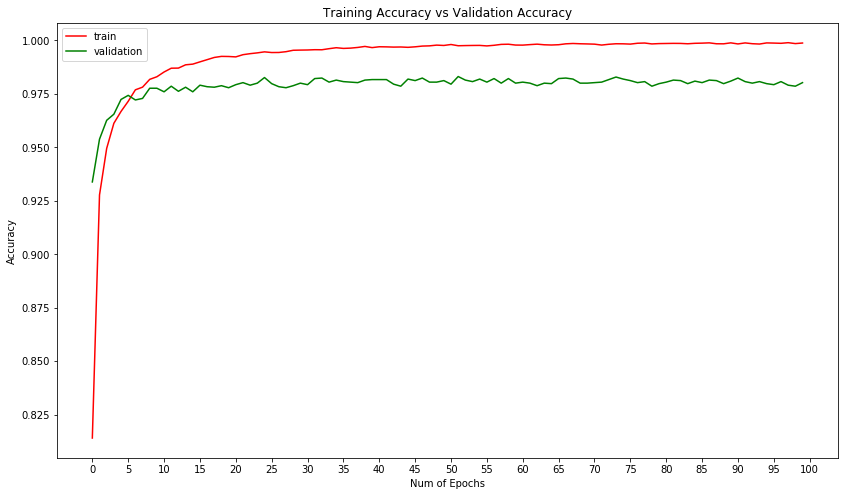

In [58]:
plt.figure(0)
plt.plot(H2.history['acc'],'r')
plt.plot(H2.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 5.0))
plt.rcParams['figure.figsize'] = (14, 8)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

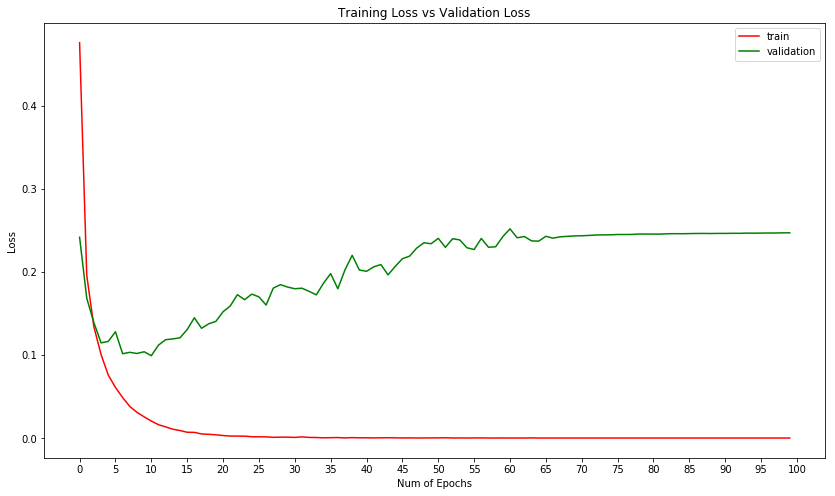

In [59]:
plt.figure(1)
plt.plot(H1.history['loss'],'r')
plt.plot(H1.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 5.0))
plt.rcParams['figure.figsize'] = (14, 8)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

In [60]:
score = model.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16869320477089808
Test accuracy: 0.9802380952380952


In [ ]:
preds = model2.predict_classes(X_val)
y_lable = [y.argmax() for y in Y_val]
print(classification_report(y_lable,preds))
preds1 = model2.predict_classes(X_train)
ytr_lable = [y.argmax() for y in Y_train]
print(classification_report(ytr_lable,preds1))

In [48]:
# predict results
Test_perd = model2.predict(X_test)

# select the indix with the maximum probability
Test_perd = np.argmax(Test_perd,axis = 1)

Test_perd = pd.Series(Test_perd,name="Label")

submission2 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),Test_perd],axis = 1)

submission2.to_csv("submission2.csv",index=False)

